# Sentiment Analysis Project
+ Emotion Detection In Text
+ Text Classifier

In [146]:
# Load EDA Pakages
import pandas as pd
import numpy as np

In [147]:
# Load Data Vizualize Pakages
import seaborn as sns

In [148]:
# Load Text Cleaning Pakages
import neattext.functions as nfx

In [149]:
# Load ML Pakages
#Estmators
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [150]:
import re
import contractions

In [151]:
#Load Dataset 1
dataset1 = pd.read_csv('./data/emotion-dataset.csv')

#Load Dataset 2

dataset2 = pd.read_csv('./data/tweet_emotions.csv')

In [152]:
dataset1.describe()

,Emotion,Text
count,34792,34792
unique,8,31110
top,joy,Yes .
freq,11045,76


In [153]:
dataset1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
34787    False
34788    False
34789    False
34790    False
34791    False
Length: 34792, dtype: bool

In [154]:
dataset1.drop_duplicates()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...
...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...
34788,joy,The world didnt give it to me..so the world MO...
34789,anger,A man robbed me today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO..."


In [155]:
dataset1.duplicated().sum()

3630

In [156]:
dataset2.describe()

,Emotion,Text
count,40000,40000
unique,13,39827
top,neutral,I just received a mothers day card from my lov...
freq,8638,14


In [157]:
dataset2.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
39995    False
39996    False
39997    False
39998    False
39999    False
Length: 40000, dtype: bool

In [158]:
data = dataset1 #pd.concat([dataset1, dataset2], axis=0)
data.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [159]:
data.describe()

,Emotion,Text
count,34792,34792
unique,8,31110
top,joy,Yes .
freq,11045,76


In [160]:
# Value Counts
data['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

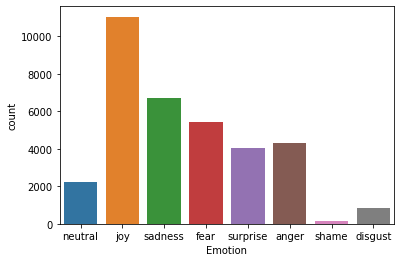

In [161]:
#Plot
sns.countplot(x='Emotion', data= data)

# Data Cleaning


In [162]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [163]:
# User Handles
data['Clean_Text'] =data['Text'].apply(nfx.remove_userhandles)

In [164]:
# Stopwords
data['Clean_Text'] =data['Clean_Text'].apply(nfx.remove_shortwords)

In [165]:
# Remove Special Characters
data['Clean_Text'] =data['Clean_Text'].apply(nfx.remove_special_characters)

In [166]:
# Remove Numbers
data['Clean_Text'] = data['Clean_Text'].apply(nfx.remove_numbers)



In [167]:
# Remove unnecessary characters and symbols
data['Clean_Text'] = data['Text'].apply(lambda x: re.sub(r"[^a-zA-Z\s]", "", x))

In [168]:
# Function to expand contractions in text
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

# Apply contraction expansion to 'Clean_Text' column
data['Clean_Text'] = data['Clean_Text'].apply(expand_contractions)

In [169]:
# Features & Lables
Xfeatures = data['Clean_Text']
ylabels = data['Emotion']

In [170]:
# Split Data - Without Feature Scaling
x_train, x_test, y_train, y_test = train_test_split(Xfeatures, ylabels, test_size=0.3, random_state=42)

In [171]:
# Build Pipline
from sklearn.pipeline import Pipeline

In [172]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Logistic Regression Classifier
lr_classifier = LogisticRegression()

# Naive Bayes Classifier
nb_classifier = MultinomialNB()

# Support Vector Machines Classifier
svm_classifier = SVC(probability=True)

In [173]:
# Naive Bayes Pipeline
pipe_nb = Pipeline(steps=[('cv', CountVectorizer()),('nb', nb_classifier)])

# LogisticRegression Pipeline
pipe_lr =Pipeline(steps=[('cv', CountVectorizer()),('lr', lr_classifier)])

# Decision Tree Pipeline
pipe_dt = Pipeline(steps=[('cv', CountVectorizer()),('dt', dt_classifier)]) 

# SVM Pipeline
pipe_svm = Pipeline(steps=[('cv', CountVectorizer()), ('svm', svm_classifier)])

In [174]:
# Train and Fit Data
pipe_lr.fit(x_train, y_train)

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [175]:
pipe_nb.fit(x_train, y_train)


Pipeline(steps=[('cv', CountVectorizer()), ('nb', MultinomialNB())])

In [176]:
pipe_dt.fit(x_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('dt', DecisionTreeClassifier())])

In [177]:
pipe_svm.fit(x_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('svm', SVC(probability=True))])

In [178]:
# Check Accuracy - LogisticRegression
pipe_lr.score(x_test, y_test)


0.6348917417129718

In [179]:
#Check Accuracy - Naive Bayes
pipe_nb.score(x_test, y_test)

0.5666794405058441

In [180]:
# Check Accuracy - Decision Tree
pipe_dt.score(x_test, y_test)

0.5235677332822379

In [181]:
pipe_svm.score(x_test, y_test)

0.6112282046369036

In [182]:
# Make A Prediction
ex1 = "This book was so interesting it made me happy"

In [183]:
#LogisticRegression Prediction
pipe_lr.predict([ex1])


array(['joy'], dtype=object)

In [184]:
# Naive Bayes Prediction
pipe_nb.predict([ex1])

array(['joy'], dtype='<U8')

In [185]:
# Decision Tree Prediction
pipe_dt.predict([ex1])

array(['joy'], dtype=object)

In [186]:
# Prediction Probability - LogisticRegression
pipe_lr.predict_proba([ex1])

array([[6.76968811e-03, 8.74013197e-03, 2.17608806e-03, 8.76470995e-01,
        1.64682128e-03, 1.74538067e-02, 1.17642390e-04, 8.66248269e-02]])

In [187]:
# Prediction Probability - Decision Tree
pipe_dt.predict_proba([ex1])

array([[0., 0., 0., 1., 0., 0., 0., 0.]])

In [188]:
# Prediction Probability - Naive Bayes
pipe_nb.predict_proba([ex1])

array([[1.04983798e-03, 2.91318273e-07, 1.79929463e-04, 9.72971987e-01,
        1.75990609e-07, 2.42171479e-02, 1.95813802e-12, 1.58063013e-03]])

In [189]:
# Prediction Probability - SVM
pipe_svm.predict_proba([ex1])

array([[0.0298429 , 0.03999051, 0.00883832, 0.75381835, 0.01665305,
        0.05141545, 0.00129771, 0.09814371]])

In [190]:
# To Know the classes - Logistic Regression
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [191]:
# To Know the classes - Decision Tree
pipe_dt.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [192]:
# To Know the classes - Naive Bayes
pipe_nb.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [193]:
# To Know the classes - SVM
pipe_svm.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [194]:
# Save Model & Pipeline
import joblib
pipline_file = open("emotion_classifier_pipe_lr_18_june_2023.pkl", "wb")
joblib.dump(pipe_lr, pipline_file)
pipline_file.close()

pipline_file_nb = open("emotion_classifier_pipe_nb_19_june_2023.pkl", "wb")
joblib.dump(pipe_nb, pipline_file_nb)
pipline_file_nb.close()

pipline_file_dt = open("emotion_classifier_pipe_dt_19_june_2023.pkl", "wb")
joblib.dump(pipe_dt, pipline_file_dt)
pipline_file_dt.close()

pipline_file_svm = open("emotion_classifier_pipe_svm_19_june_2023.pkl", "wb")
joblib.dump(pipe_svm, pipline_file_svm)
pipline_file_svm.close()